In [1]:
from collections import Counter
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd
import re
import requests

In [2]:
NYT_SEARCH_URL = 'https://www.nytimes.com/svc/add/v1/sitesearch.json'
MAX_PAGE_NUM = 120

In [3]:
headers = {
    'accept': '*/*',
    'nyt-app-type': 'NYT-iOS-Fusion',
    'nyt-agent-id': 'C94DE527-EF98-4A32-B0C0-D5D10CE90123',
    'nyt-os-version': '16.1.0',
    'accept-language': 'en-US,en;q=0.9',
    'accept-encoding': 'gzip, deflate, br',
    'x-emb-st': '1669835008017',
    'nyt-device-model': 'iPhone',
    'nyt-app-version': '9.89.1',
    'user-agent': 'NYTimes%206.0/104916.221121 CFNetwork/1399 Darwin/22.1.0',
    'x-emb-id': '33F28918C0214325998392DA87BBBD46'
}

In [4]:
war_terms = ['nuclear', 'missile', 'icbm', 'dictator', 'leader', 'sanction', 'ballistic', 'weapon', 'threat']
human_terms = ['famine', 'life', 'lives', 'defect', 'refugee', 'citizen']

all_headlines = []
all_pub_dates = []

cum_headline_terms = []
article_count = 0
human_terms_count = 0
war_terms_count = 0

for page_num in range(1, MAX_PAGE_NUM):

    params = {
        'q': 'North Korea',
        'page': f'{page_num}',
        'type': 'article',
        'fq': 'has_papi:true'
    }

    response = requests.get(NYT_SEARCH_URL, params=params, headers=headers)

    articles = response.json()['response']['docs']

    for article in articles:

        article_count += 1
        
        pub_date = datetime.strptime(article['pub_date'].split('T')[0], '%Y-%m-%d')
        all_pub_dates.append(pub_date)
        
        headline = article['headline']['main']
        all_headlines.append(headline)
        
        headline_terms = [re.sub(r'\W+', '', word).lower() for word in headline.split() if word]
        
        for word in headline_terms:
            cum_headline_terms.append(word)

        for human_term in human_terms:
            if human_term in headline.lower():
                print(f"'{headline}', human")
                human_terms_count += 1
                break

        for war_term in war_terms:
            if war_term in headline.lower():
                print(f"'{headline}', war")
                war_terms_count += 1
                break

'North Korea Tests a Missile and Flies Warplanes Near Border With South', war
'It’s Time to Accept That North Korea Has Nuclear Weapons', war
'North Korea’s Threat', war
'North Korea Says It Is Building Underwater Nuclear Weapons Silos', war
'U.S. Targets Businessmen and Companies in New North Korea Sanctions', war
'North Korea Fires 2 Ballistic Missiles, Condemning Security Council Meeting', war
'North Korea Fires Powerful Missile, Using Old Playbook in a New World', war
'North Korea Launches Two Ballistic Missiles, Fourth Test in a Week', war
'North Korea Fires Two Missiles, Third Test in a Week', war
'North Korea Launches Ballistic Missile Off Its East Coast', war
'Physics Body Concedes Mistakes in Study of Missile Defense', war
'North Korea Launches Two Missiles in First Test Since June', war
'‘One miscalculation away from nuclear annihilation’: The U.N. chief issues a grim warning, citing war.', war
'North Korea Launches a Volley of Short-Range Missiles', war
'North Korea Launches

'4 North Koreans defect to South', human
'Security Council Condemns Nuclear Test by North Korea', war
'Envoy to Coordinate North Korea Sanctions', war
'North Korea threatens civilian planes', war
'With U.S. Focus on Ukraine, North Korea Launches a Powerful New ICBM', war
'North Korea rebuilding nuclear facility', war
'North Korea rebuilding nuclear facility', war
'North Korea nuclear talks to resume', war
'Bush Still Waits for North Korean Nuclear Report', war
'Removing the Nuclear Threat in North Korea', war
'North Korea threatens missile test', war
'North Korea Warns It Is on Brink of Nuclear War With South', war
'North Korea: Nuclear Talks Extended', war
'North Korea allows nuclear inspectors', war
'Clinton warns North Korea on missiles', war
'Clinton warns North Korea on missiles', war
'North Korean Leader Is Said to Pick a Son as Heir', war
'North Korea Offers Nuclear Concessions', war
'North Korea Will Resume Nuclear Talks', war
'North Korea Confirms It Conducted 3rd Nuclear Test

In [5]:
def get_pct_published_after_date(date: datetime, df: pd.DataFrame) -> float:
    return len(df[df['date'] >= date]) / len(df)

In [6]:
df = pd.DataFrame(list(zip(all_headlines, all_pub_dates)), columns=['headline', 'date'])

In [7]:
get_pct_published_after_date(datetime(2010, 1, 1), df)

0.47983193277310926

In [8]:
get_pct_published_after_date(datetime(2009, 1, 1), df)

0.5588235294117647

In [9]:
term_value_counts = Counter(cum_headline_terms)

In [11]:
sorted_counts = {w: term_value_counts[w] for w in sorted(dict(term_value_counts), key=term_value_counts.get, reverse=True)}

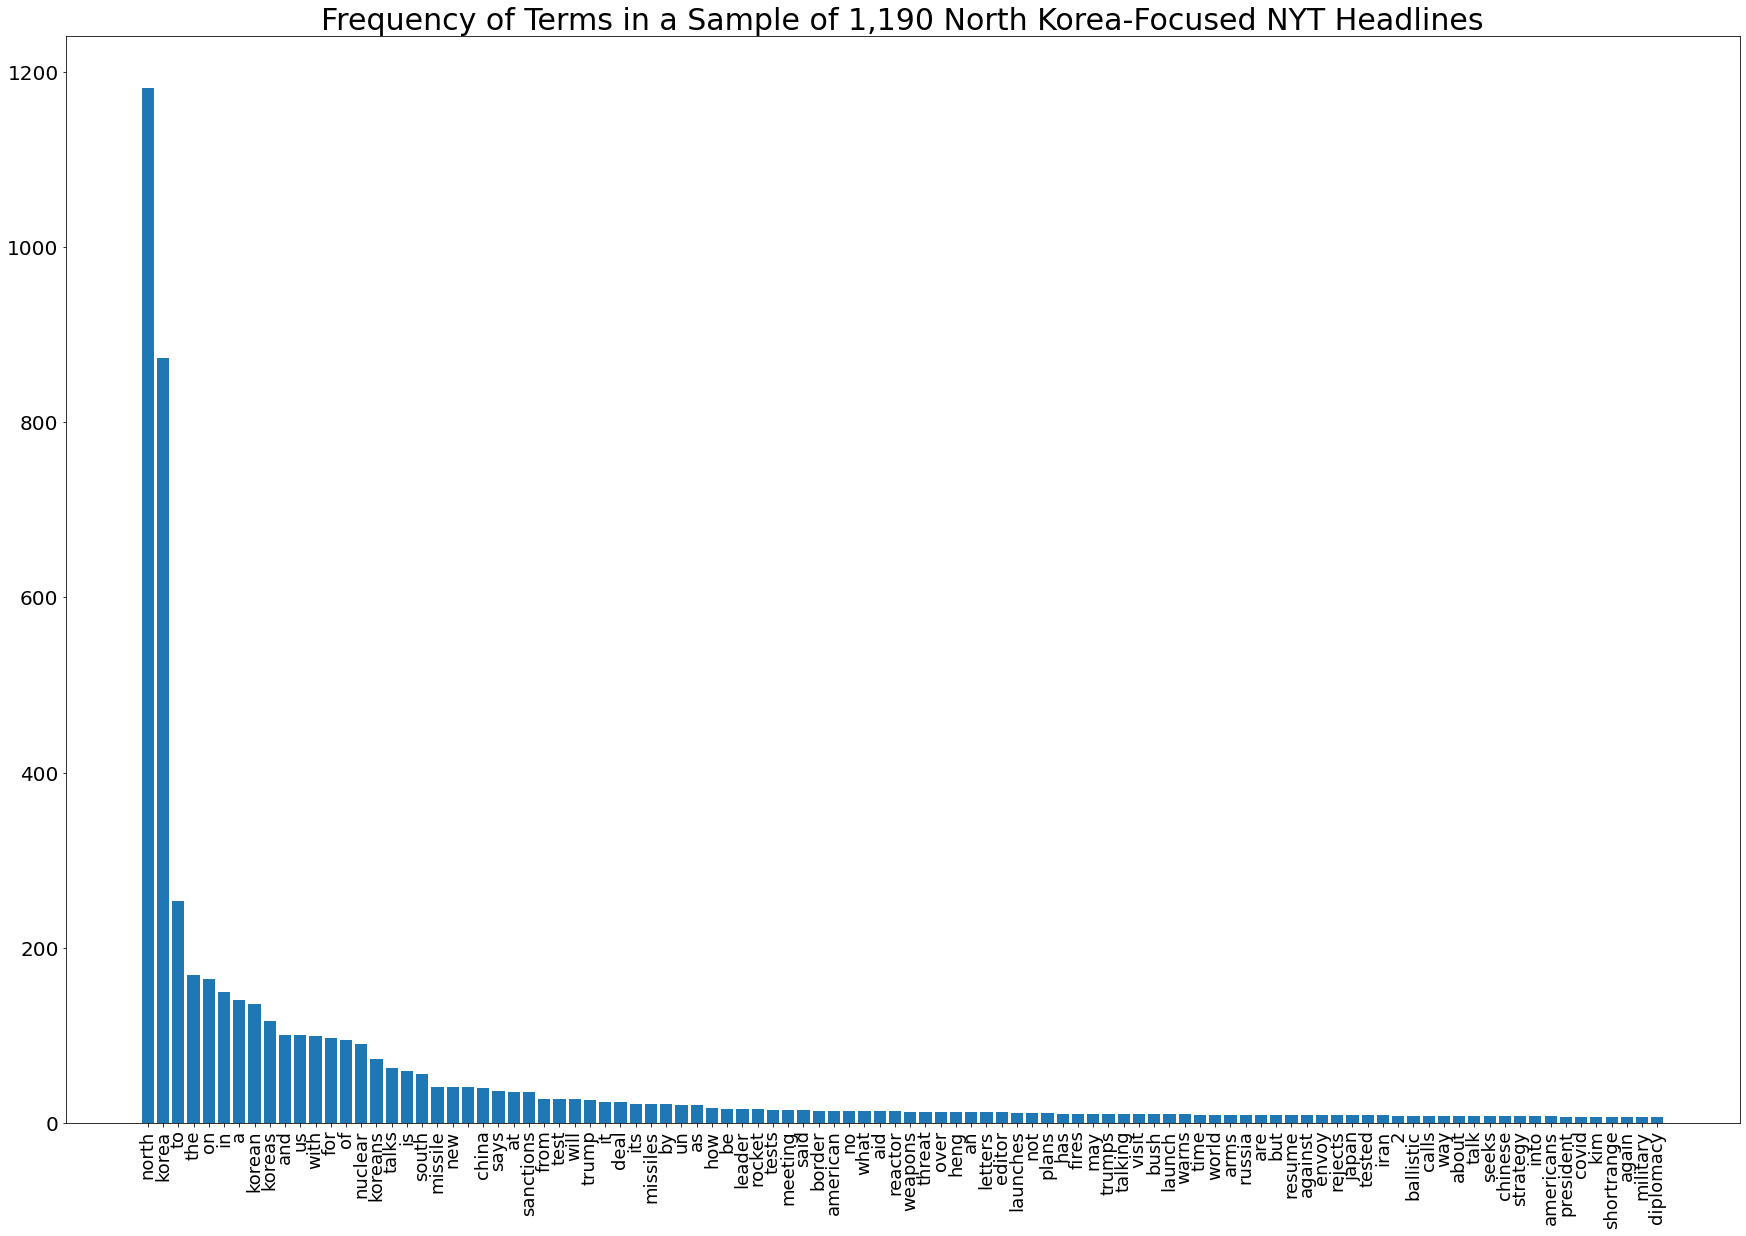

In [12]:
n_terms_to_plot = 100
x_ticks = list(range(len(sorted_counts)))[:n_terms_to_plot]
plt.figure(figsize=(30, 20))
plt.bar(x_ticks, list(sorted_counts.values())[:n_terms_to_plot])
plt.xticks(x_ticks, labels=list(sorted_counts.keys())[:n_terms_to_plot], rotation=90, size=18);
plt.yticks(size=20);
plt.title('Frequency of Terms in a Sample of 1,190 North Korea-Focused NYT Headlines', size=30);
plt.savefig('korea-term-freqs.png')

In [13]:
human_terms_count / article_count

0.034453781512605045

In [14]:
war_terms_count / article_count

0.2042016806722689

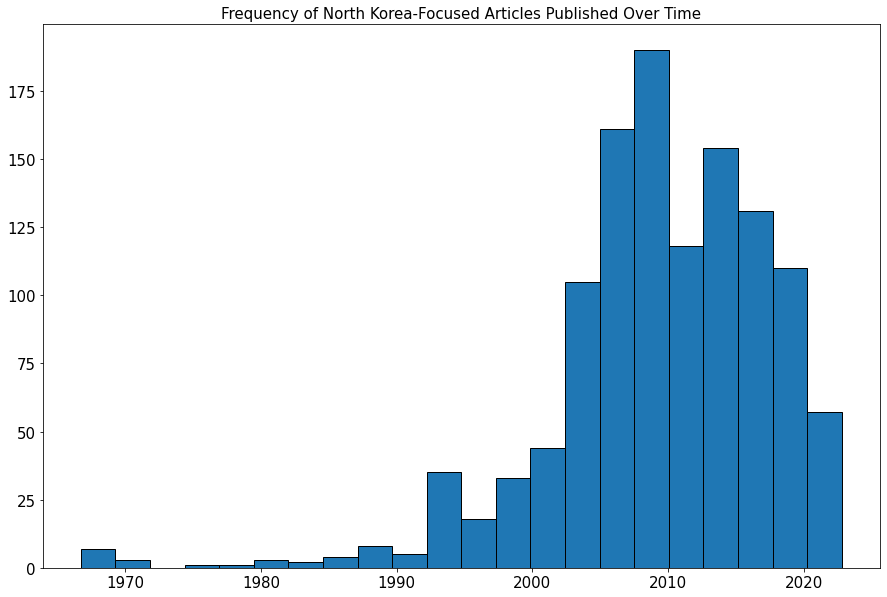

In [15]:
fig, ax = plt.subplots()

ax.hist(all_pub_dates, bins=22, edgecolor='black');
ax.tick_params(axis='both', labelsize=15);
ax.figure.set_size_inches(15, 10)
ax.set_title('Frequency of North Korea-Focused Articles Published Over Time', size=15);
fig.savefig('korea-pub-dates.png')